# Explore here

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import xgboost as xgb
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import joblib

In [51]:

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv",sep=";")
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [52]:
df.shape

(41188, 21)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [54]:
n_unicos = df.nunique()
n_unicos

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

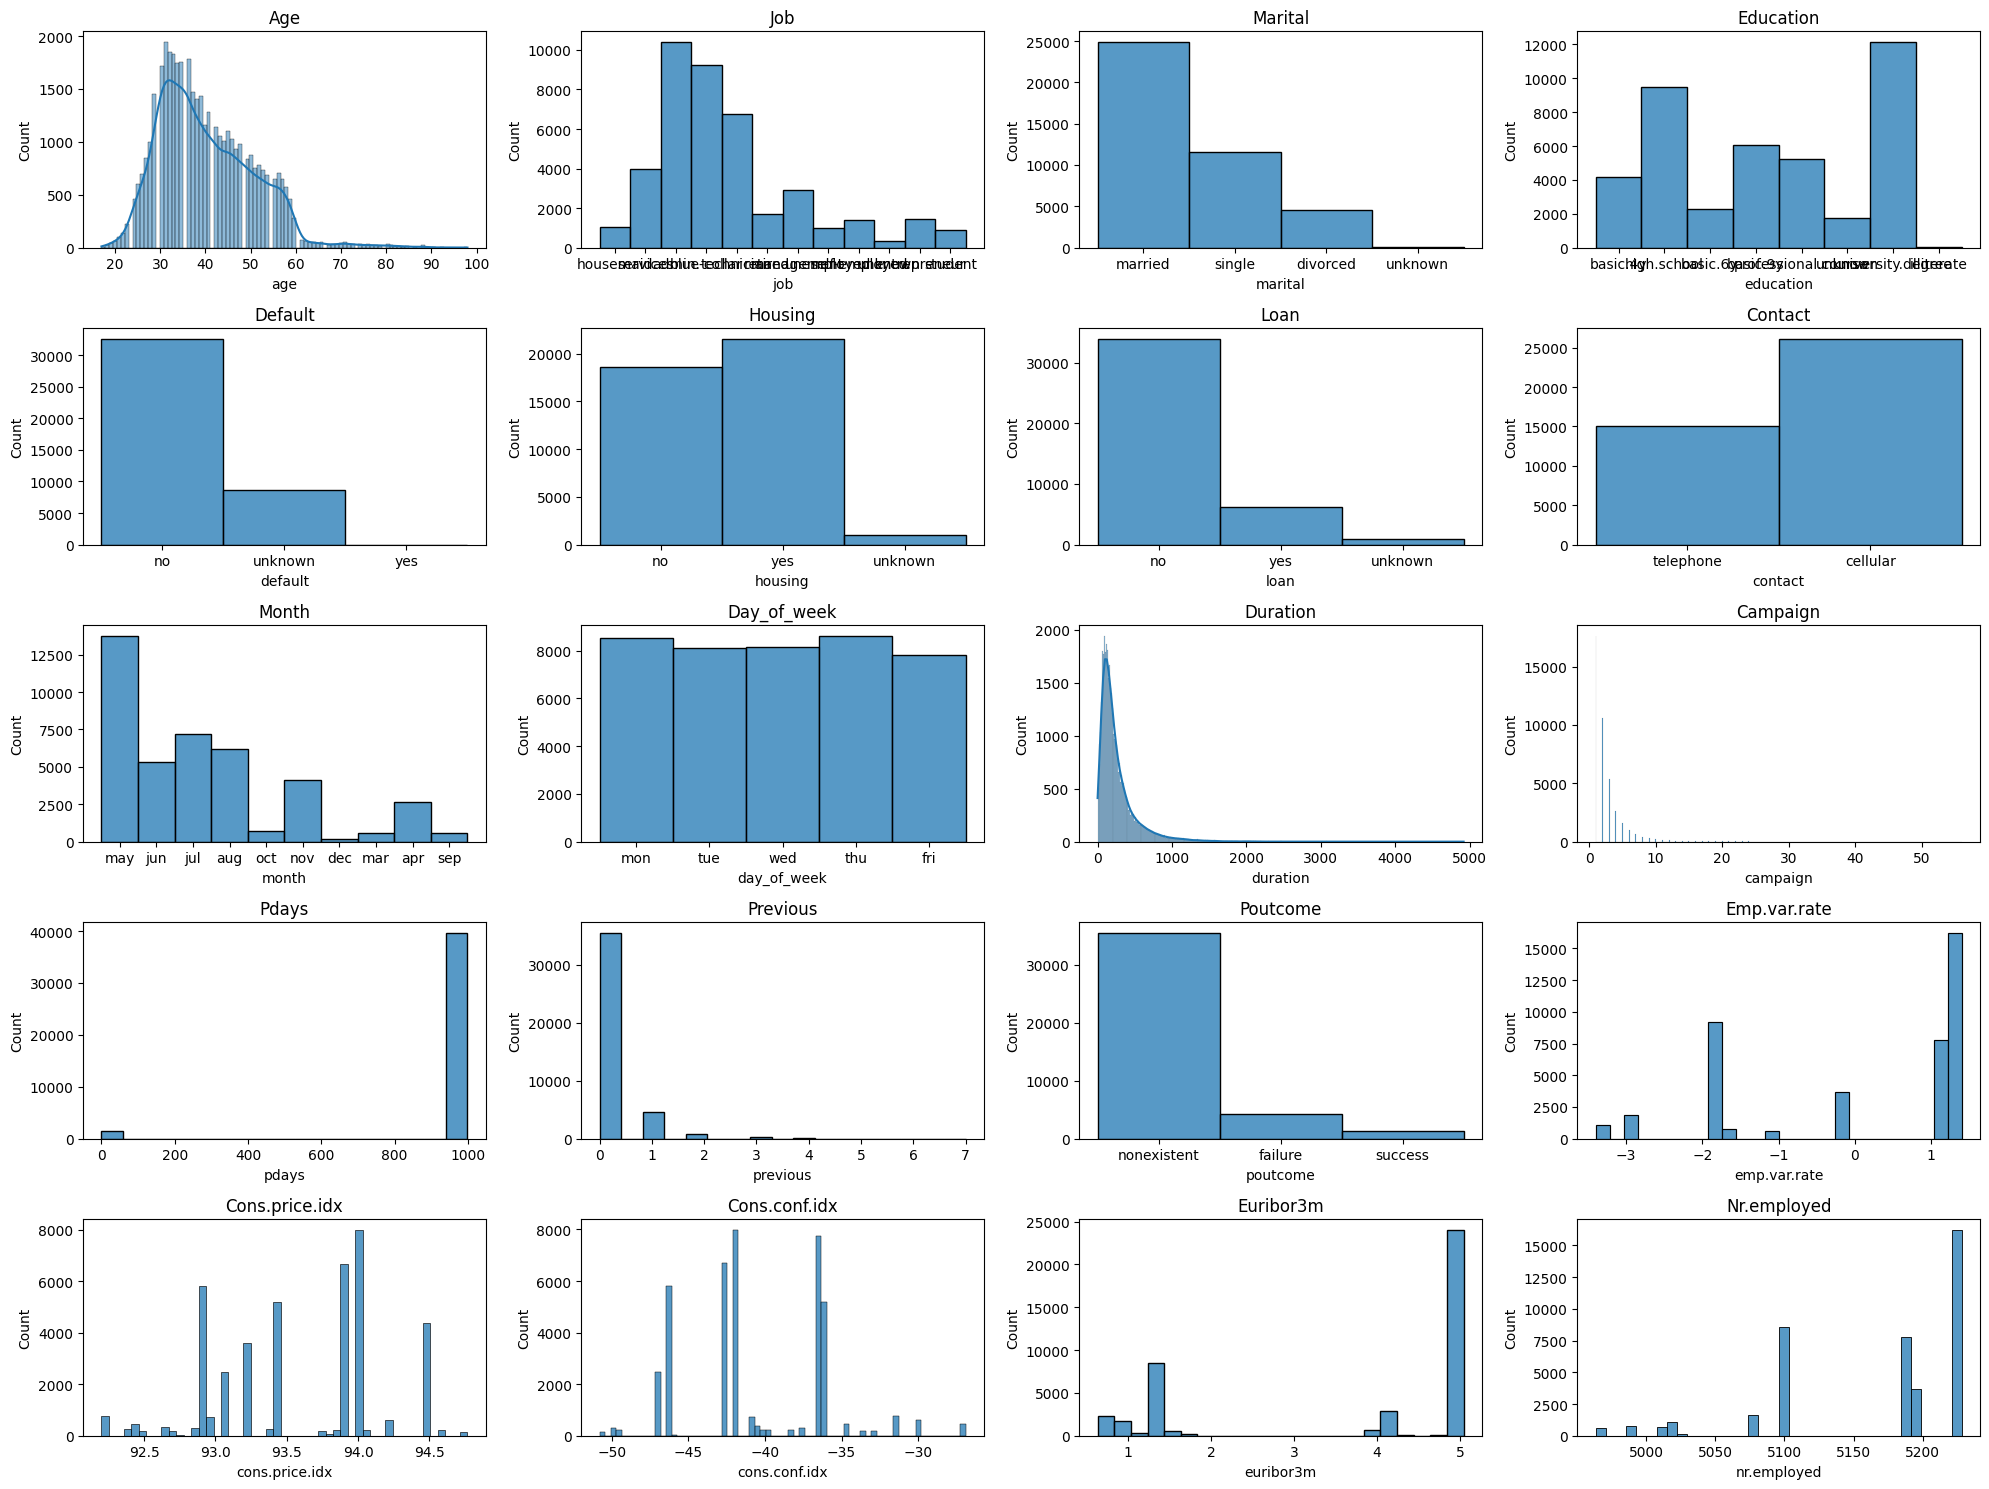

In [55]:


fig, axis = plt.subplots(5, 4, figsize = (20, 15))

# Crear un histograma múltiple
sns.histplot(ax=axis[0, 0], data=df, x="age", kde=True)
axis[0, 0].set_title("Age")

sns.histplot(ax=axis[0, 1], data=df, x="job")
axis[0, 1].set_title("Job")

sns.histplot(ax=axis[0, 2], data=df, x="marital")
axis[0, 2].set_title("Marital")

sns.histplot(ax=axis[0, 3], data=df, x="education")
axis[0, 3].set_title("Education")

sns.histplot(ax=axis[1, 0], data=df, x="default")
axis[1, 0].set_title("Default")

sns.histplot(ax=axis[1, 1], data=df, x="housing")
axis[1, 1].set_title("Housing")

sns.histplot(ax=axis[1, 2], data=df, x="loan")
axis[1, 2].set_title("Loan")

sns.histplot(ax=axis[1, 3], data=df, x="contact")
axis[1, 3].set_title("Contact")

sns.histplot(ax=axis[2, 0], data=df, x="month")
axis[2, 0].set_title("Month")

sns.histplot(ax=axis[2, 1], data=df, x="day_of_week")
axis[2, 1].set_title("Day_of_week")

sns.histplot(ax=axis[2, 2], data=df, x="duration", kde=True)
axis[2, 2].set_title("Duration")

sns.histplot(ax=axis[2, 3], data=df, x="campaign")
axis[2, 3].set_title("Campaign")

sns.histplot(ax=axis[3, 0], data=df, x="pdays")
axis[3, 0].set_title("Pdays")

sns.histplot(ax=axis[3, 1], data=df, x="previous")
axis[3, 1].set_title("Previous")

sns.histplot(ax=axis[3, 2], data=df, x="poutcome")
axis[3, 2].set_title("Poutcome")

sns.histplot(ax=axis[3, 3], data=df, x="emp.var.rate")
axis[3, 3].set_title("Emp.var.rate")

sns.histplot(ax=axis[4, 0], data=df, x="cons.price.idx")
axis[4, 0].set_title("Cons.price.idx")

sns.histplot(ax=axis[4, 1], data=df, x="cons.conf.idx")
axis[4, 1].set_title("Cons.conf.idx")

sns.histplot(ax=axis[4, 2], data=df, x="euribor3m")
axis[4, 2].set_title("Euribor3m")

sns.histplot(ax=axis[4, 3], data=df, x="nr.employed")
axis[4, 3].set_title("Nr.employed")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [56]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


<Axes: >

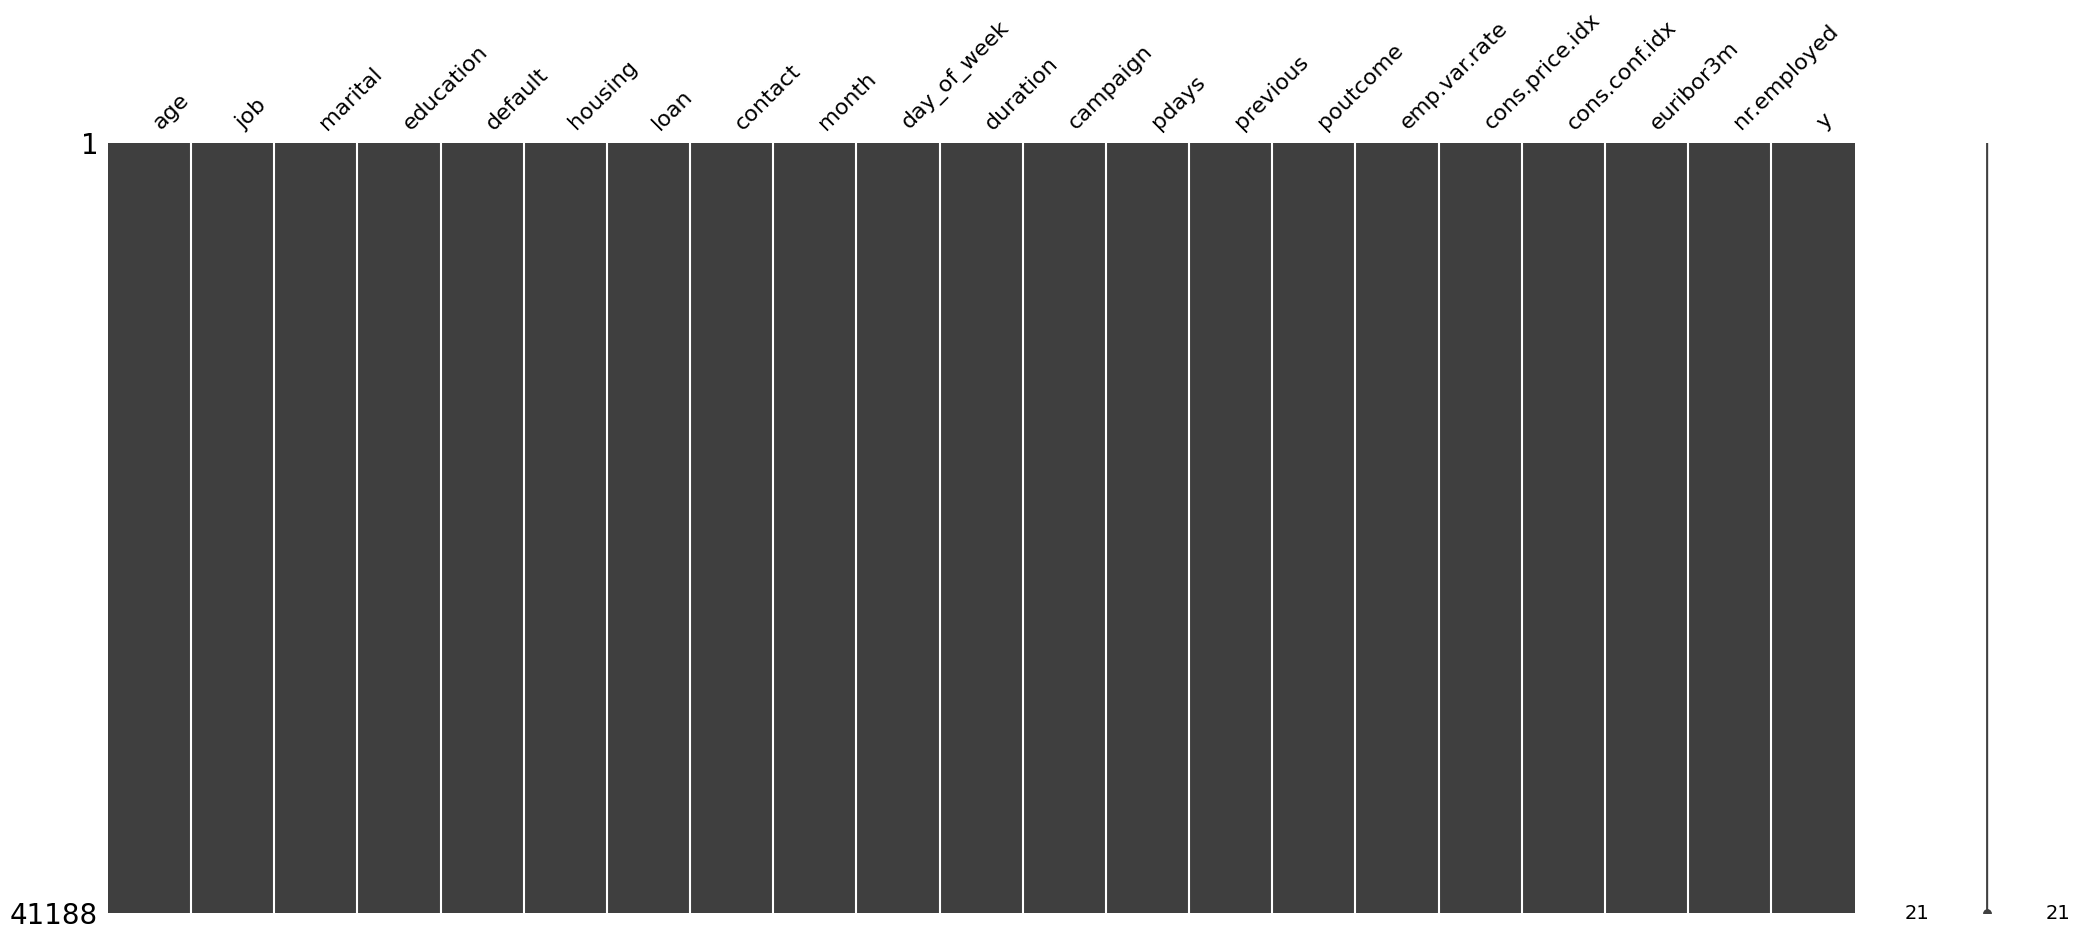

In [57]:
msno.matrix(df)

In [58]:
# Factorizar los datos no numericos
df["job"] = pd.factorize(df["job"])[0]
df["marital"] = pd.factorize(df["marital"])[0]
df["education"] = pd.factorize(df["education"])[0]
df["housing"] = pd.factorize(df["housing"])[0]
df["day_of_week"] = pd.factorize(df["day_of_week"])[0]
df["default"] = pd.factorize(df["default"])[0]
df["loan"] = pd.factorize(df["loan"])[0]
df["contact"] = pd.factorize(df["contact"])[0]
df["month"] = pd.factorize(df["month"])[0]
df["poutcome"] = pd.factorize(df["poutcome"])[0]
df["y"] = pd.factorize(df["y"])[0]

In [59]:
# Separamos las variables independientes de la dependiente
X = df.drop(['y'], axis=1)
y = df['y']

# Ajusta un modelo de regresión lineal
X = sm.add_constant(X)
model = sm.Logit(y, X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.214437
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41167
Method:                           MLE   Df Model:                           20
Date:                Mon, 27 Jan 2025   Pseudo R-squ.:                  0.3909
Time:                        20:25:51   Log-Likelihood:                -8832.3
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -145.5947     17.066     -8.531      0.000    -179.043    -112.146
age              

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Usamos xgb para conocer la importancia de las características
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train, y_train)
df = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100})
df = df.sort_values(by='Importance', ascending=False)
df

,Feature,Importance
0,nr.employed,44.29
2,duration,9.28
4,month,6.68
3,pdays,5.80
5,cons.conf.idx,4.81
7,default,4.27
8,euribor3m,3.59
6,cons.price.idx,3.54
9,contact,3.16
11,day_of_week,3.14


In [86]:
# Seleccionamos las características que presentan más de un 1% de importancia
X_train = X_train[df[df.Importance>1]['Feature'].values]
X_test = X_test[df[df.Importance>1]['Feature'].values]

In [87]:
X_train.corr()

,nr.employed,duration,month,pdays,cons.conf.idx,default,euribor3m,cons.price.idx,contact,day_of_week,emp.var.rate,poutcome,education,campaign
nr.employed,1.00,-0.05,-0.26,0.37,0.10,0.19,0.95,0.52,-0.27,-0.00,0.91,-0.51,-0.03,0.14
duration,-0.05,1.00,0.02,-0.05,-0.01,-0.01,-0.04,0.01,0.03,0.01,-0.03,0.03,-0.01,-0.07
month,-0.26,0.02,1.00,-0.13,-0.06,-0.13,-0.28,-0.33,0.43,0.01,-0.31,0.18,0.12,-0.08
pdays,0.37,-0.05,-0.13,1.00,-0.09,0.08,0.30,0.08,-0.12,0.01,0.27,-0.74,-0.04,0.05
cons.conf.idx,0.10,-0.01,-0.06,-0.09,1.00,0.02,0.28,0.06,-0.25,-0.00,0.19,-0.04,0.07,-0.01
default,0.19,-0.01,-0.13,0.08,0.02,1.00,0.20,0.17,-0.13,-0.01,0.20,-0.11,-0.14,0.03
euribor3m,0.95,-0.04,-0.28,0.30,0.28,0.20,1.00,0.69,-0.40,-0.01,0.97,-0.48,-0.02,0.14
cons.price.idx,0.52,0.01,-0.33,0.08,0.06,0.17,0.69,1.00,-0.59,-0.01,0.77,-0.26,-0.08,0.13
contact,-0.27,0.03,0.43,-0.12,-0.25,-0.13,-0.40,-0.59,1.00,-0.02,-0.39,0.23,0.09,-0.08
day_of_week,-0.00,0.01,0.01,0.01,-0.00,-0.01,-0.01,-0.01,-0.02,1.00,-0.01,0.00,0.01,0.01


In [88]:
# Identificar las variables binarias
binary_cols = X_train[(X_train == 0)|(X_train == 1)].dropna(axis=1).columns
binary_cols

Index(['contact'], dtype='object')

In [89]:
# seleciono las columnas que no son binarias
X_train_num = X_train.drop(binary_cols, axis=1)
X_test_num = X_test.drop(binary_cols, axis=1)

In [90]:
# Instancio la clase del escalador y lo ajusto con los datos de entrenamiento
scaler = MinMaxScaler().fit(X_train_num)

In [91]:
# Trasnformamos los datos numericos con el escalador ajustado
X_ẗrain_num_sc = scaler.transform(X_train_num)
X_ẗest_num_sc = scaler.transform(X_test_num)

In [92]:
X_train_sc = pd.concat([pd.DataFrame(X_ẗrain_num_sc, columns = X_train_num.columns), X_train[binary_cols].reset_index(drop=True)], axis=1)
X_test_sc = pd.concat([pd.DataFrame(X_ẗest_num_sc, columns = X_test_num.columns), X_test[binary_cols].reset_index(drop=True)], axis=1)

In [69]:
y_test

32884    0
3169     0
32206    0
9403     0
14020    0
        ..
12322    1
23440    0
29431    0
16627    1
1871     0
Name: y, Length: 8238, dtype: int64

In [70]:
X_train_sc

,nr.employed,poutcome,duration,pdays,month,cons.conf.idx,cons.price.idx,default,euribor3m,campaign,day_of_week,emp.var.rate,education,contact
0,1.00,0.00,0.02,1.00,0.22,0.34,0.67,0.50,0.98,0.02,0.00,1.00,0.43,0
1,0.51,0.00,0.02,1.00,0.00,0.19,0.27,0.00,0.14,0.05,0.00,0.33,0.86,1
2,0.51,0.50,0.00,1.00,0.00,0.19,0.27,0.00,0.16,0.09,0.00,0.33,0.00,1
3,1.00,0.00,0.02,1.00,0.22,0.34,0.67,0.00,0.98,0.07,0.25,1.00,0.43,1
4,0.86,0.00,0.07,1.00,0.00,0.60,0.70,0.50,0.96,0.02,0.75,0.94,0.14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,0.86,0.00,0.09,1.00,0.00,0.60,0.70,0.50,0.96,0.02,0.25,0.94,0.57,0
32946,1.00,0.00,0.06,1.00,0.11,0.38,0.88,0.00,0.98,0.00,0.75,1.00,0.86,0
32947,0.20,1.00,0.04,0.00,0.44,1.00,0.09,0.00,0.03,0.00,0.75,0.00,0.14,1
32948,0.86,0.00,0.06,1.00,0.00,0.60,0.70,0.00,0.96,0.02,0.50,0.94,0.86,0


In [93]:
# Ajuste del modelo de regresión logística
logreg = LogisticRegression() 
logreg.fit(X_train_sc, y_train)

LogisticRegression()

In [94]:
# Instanciamos el estimador
estimator = RandomForestClassifier()

# Definimos el espacio de búsqueda de los hp
param_dist = {'n_estimators':[10, 50, 100, 250], 'max_depth':np.arange(10, 50, 10)}

# Realizamos la búsqueda aleatoria
random_search = RandomizedSearchCV(estimator, param_dist, n_iter=5, random_state=42, n_jobs=-1, scoring='accuracy', verbose=2, cv=5)
random_search.fit(X_train_sc, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ......................max_depth=10, n_estimators=10; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=10; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=10; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=10; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=10; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.9s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.9s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.9s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.9s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.9s
[CV] END ......................max_depth=20, n_estimators=50; total time=   1.2s
[CV] END ......................max_depth=20, n_es

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([10, 20, 30, 40]),
                                        'n_estimators': [10, 50, 100, 250]},
                   random_state=42, scoring='accuracy', verbose=2)

In [95]:
random_search.best_score_

np.float64(0.9150834597875569)

In [96]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': np.int64(10)}

In [97]:
random_search.best_estimator_

RandomForestClassifier(max_depth=np.int64(10), n_estimators=50)

In [116]:
param_dist = {'n_estimators':[20,30,40,50,100], 'max_depth':np.arange(10, 20, 40)}

# Realizamos la búsqueda por fuerza bruta
grid_search = GridSearchCV(estimator, param_dist, verbose=3)
grid_search.fit(X_train_sc, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .....max_depth=10, n_estimators=20;, score=0.912 total time=   0.2s
[CV 2/5] END .....max_depth=10, n_estimators=20;, score=0.911 total time=   0.2s
[CV 3/5] END .....max_depth=10, n_estimators=20;, score=0.911 total time=   0.2s
[CV 4/5] END .....max_depth=10, n_estimators=20;, score=0.916 total time=   0.2s


[CV 5/5] END .....max_depth=10, n_estimators=20;, score=0.915 total time=   0.2s
[CV 1/5] END .....max_depth=10, n_estimators=30;, score=0.914 total time=   0.4s
[CV 2/5] END .....max_depth=10, n_estimators=30;, score=0.912 total time=   0.4s
[CV 3/5] END .....max_depth=10, n_estimators=30;, score=0.912 total time=   0.4s
[CV 4/5] END .....max_depth=10, n_estimators=30;, score=0.914 total time=   0.3s
[CV 5/5] END .....max_depth=10, n_estimators=30;, score=0.917 total time=   0.3s
[CV 1/5] END .....max_depth=10, n_estimators=40;, score=0.912 total time=   0.5s
[CV 2/5] END .....max_depth=10, n_estimators=40;, score=0.913 total time=   0.5s
[CV 3/5] END .....max_depth=10, n_estimators=40;, score=0.911 total time=   0.5s
[CV 4/5] END .....max_depth=10, n_estimators=40;, score=0.915 total time=   0.4s
[CV 5/5] END .....max_depth=10, n_estimators=40;, score=0.918 total time=   0.4s
[CV 1/5] END .....max_depth=10, n_estimators=50;, score=0.913 total time=   0.6s
[CV 2/5] END .....max_depth=

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([10]),
                         'n_estimators': [20, 30, 40, 50, 100]},
             verbose=3)

In [117]:
grid_search.best_params_

{'max_depth': np.int64(10), 'n_estimators': 100}

In [118]:
y_pred_train = np.exp(grid_search.best_estimator_.predict(X_train_sc))
y_pred_test = np.exp(grid_search.best_estimator_.predict(X_test_sc))
y_train_eu = np.exp(y_train)
y_test_eu = np.exp(y_test)

In [119]:
def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular las métricas para entrenamiento
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mape_train = mean_absolute_percentage_error(y_train, y_pred_train)*100
    r2_train = r2_score(y_train, y_pred_train)

    # Calcular las métricas para test
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_test)*100
    r2_test = r2_score(y_test, y_pred_test)

    # Calcular las diferencias
    mae_diff = mae_test - mae_train
    mape_diff = mape_test - mape_train
    r2_diff = r2_test - r2_train

    # Crear el DataFrame
    metrics_df = pd.DataFrame({
        'MAE': [mae_train, mae_test, mae_diff],
        'MAPE': [mape_train, mape_test, mape_diff],
        'R2': [r2_train, r2_test, r2_diff]
    }, index=['Train', 'Test', 'Difference'])

    return metrics_df

In [120]:
calculate_metrics(y_train_eu, y_test_eu, y_pred_train, y_pred_test)

,MAE,MAPE,R2
Train,0.11,5.35,0.37
Test,0.15,8.13,0.13
Difference,0.04,2.78,-0.24
